In [1]:
from pythtb import TBModel, Lattice
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define lattice vectors
lat_vecs = [[1, 0], [1 / 2, np.sqrt(3) / 2]]
# define coordinates of orbitals
orb_vecs = [[1 / 3, 1 / 3], [2 / 3, 2 / 3]]

lat = Lattice(lat_vecs, orb_vecs, periodic_dirs=...)

# make two dimensional tight-binding graphene model
my_model = TBModel(lat)

# set model parameters
delta = 0.0
t = -1.0

# set on-site energies
my_model.set_onsite([-delta, delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [0, 0])
my_model.set_hop(t, 1, 0, [1, 0])
my_model.set_hop(t, 1, 0, [0, 1])

Text(0, 0.5, 'y coordinate')

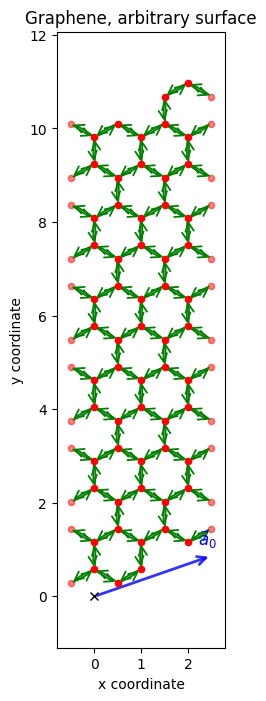

In [3]:
# make the supercell of the model
sc_model = my_model.make_supercell([[2, 1], [-1, 2]], to_home=True)

# now make a slab of the supercell
slab_model = sc_model.cut_piece(6, 1, glue_edges=False)

# visualize slab unit cell
(fig, ax) = slab_model.visualize(proj_plane=(0, 1))
ax.set_title("Graphene, arbitrary surface")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")

In [4]:
# compute the band structure in the entire band
(k_vec, k_dist, k_node) = slab_model.k_path("full", 100)
evals = slab_model.solve_ham(k_vec)

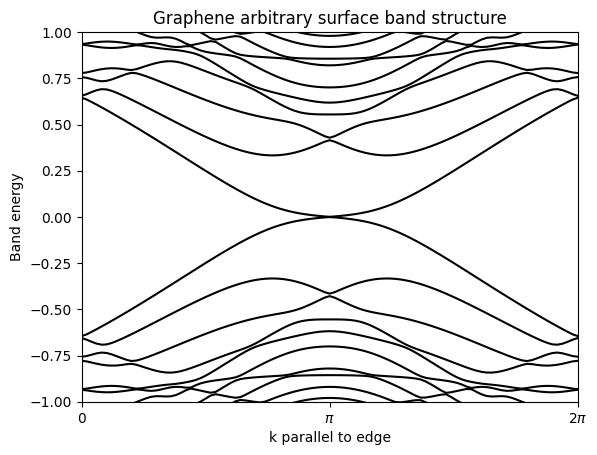

In [5]:
fig, ax = plt.subplots()
ax.plot(k_dist, evals, "k-")

# zoom in close to the zero energy
ax.set_xlim(k_dist[0], k_dist[-1])
ax.set_ylim(-1.0, 1.0)
# put title on top
ax.set_title("Graphene arbitrary surface band structure")
ax.set_xlabel("k parallel to edge")
ax.set_ylabel("Band energy")
ax.xaxis.set_ticks(k_node)
ax.set_xticklabels((r"$0$", r"$\pi$", r"$2\pi$"))
plt.show()